<a href="https://colab.research.google.com/github/Arbues/De_pixel_a_Distrito/blob/main/Clima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Exploración de Datos del Archivo GeoJSON (distritos-peru@bogota-laburbano.geojson)

El archivo GeoJSON se utiliza para obtener información geográfica sobre los distritos, como nombres de provincias y distritos, y sus coordenadas (lat y lon). Estas coordenadas son esenciales para generar las URLs que Selenium necesita para navegar a la ubicación específica en el sitio Ventusky y extraer los datos meteorológicos correspondientes. En resumen, el GeoJSON proporciona las coordenadas geográficas que el script necesita para realizar el scraping en la página web.

Primero, asegúrate de que tienes instaladas las librerías necesarias

In [6]:
!pip install geopandas folium

Importacion de librerias

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

Cargar el archivo GeoJSON


In [11]:
ruta_geojson = 'sample_data/distritos-peru@bogota-laburbano.geojson'  # Cambia la ruta si el archivo está en otro lugar
distritos = gpd.read_file(ruta_geojson)

Mostrar las primeras filas del archivo GeoJSON


In [ ]:
print("Primeras filas del archivo GeoJSON:")
print(distritos.head())

Primeras filas del archivo GeoJSON:
                                        geo_point_2d ccdd     nombdep ccpp  \
0  { "lon": -78.917689300700005, "lat": -7.364304...   06   CAJAMARCA   05   
1  { "lon": -78.873085214, "lat": -7.159047929969...   06   CAJAMARCA   12   
2  { "lon": -79.671300957300005, "lat": -7.014424...   14  LAMBAYEQUE   01   
3  { "lon": -79.857484568700002, "lat": -6.865730...   14  LAMBAYEQUE   01   
4  { "lon": -79.506682101300001, "lat": -6.888700...   14  LAMBAYEQUE   01   

    nombprov ccdi  nombdist          capital  ubigeo idprov  codigo  cnt_ccpp  \
0  CONTUMAZA   04  GUZMANGO         GUZMANGO  060504   0605  060504        50   
1  SAN PABLO   03  SAN LUIS  SAN LUIS GRANDE  061203   0612  061203         9   
2   CHICLAYO   07   LAGUNAS           MOCUPE  140107   1401  140107        27   
3   CHICLAYO   08   MONSEFU          MONSEFU  140108   1401  140108        44   
4   CHICLAYO   16   CAYALTI          CAYALTI  140116   1401  140116        18   

  descri

Visualizar la estructura de datos

In [12]:
print("\nColumnas presentes en el archivo GeoJSON:")
print(distritos.columns)


Columnas presentes en el archivo GeoJSON:
Index(['geo_point_2d', 'ccdd', 'nombdep', 'ccpp', 'nombprov', 'ccdi',
       'nombdist', 'capital', 'ubigeo', 'idprov', 'codigo', 'cnt_ccpp',
       'descripcio', 'poblacion', 'fecha', 'dat_pob', 'geometry'],
      dtype='object')


Verificar los tipos de datos


In [13]:
print("\nTipos de datos del archivo GeoJSON:")
print(distritos.dtypes)


Tipos de datos del archivo GeoJSON:
geo_point_2d      object
ccdd              object
nombdep           object
ccpp              object
nombprov          object
ccdi              object
nombdist          object
capital           object
ubigeo            object
idprov            object
codigo            object
cnt_ccpp           int32
descripcio        object
poblacion        float64
fecha            float64
dat_pob           object
geometry        geometry
dtype: object


Filtrar información básica: por ejemplo, mostrar el nombre del departamento, provincia, y distrito


In [14]:
print("\nEjemplo de departamentos, provincias y distritos:")
print(distritos[['nombdep', 'nombprov', 'nombdist']].head())


Ejemplo de departamentos, provincias y distritos:
      nombdep   nombprov  nombdist
0   CAJAMARCA  CONTUMAZA  GUZMANGO
1   CAJAMARCA  SAN PABLO  SAN LUIS
2  LAMBAYEQUE   CHICLAYO   LAGUNAS
3  LAMBAYEQUE   CHICLAYO   MONSEFU
4  LAMBAYEQUE   CHICLAYO   CAYALTI


#### Visualización rápida de los distritos en un mapa


Filtramos para graficar solo Lima y Callao (opcional)


In [30]:
distritos_lima_callao = distritos[(distritos['nombdep'] == 'CAJAMARCA') | (distritos['nombdep'] == 'LIMA') ]


Plotear el mapa de los distritos de Lima y Callao


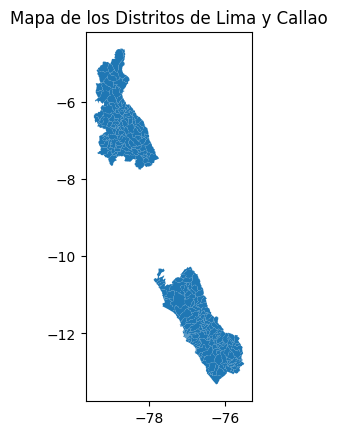

In [31]:
distritos_lima_callao.plot()
plt.title('Mapa de los Distritos de Lima y Callao')
plt.show()

#### Exploración de la Columna geo_point_2d
La columna geo_point_2d almacena las coordenadas de cada distrito en formato JSON. Vamos a desglosar esas coordenadas y convertirlas para analizarlas mejor.
Este extracto te permitirá:
- Convertir el campo geo_point_2d de un string JSON a un diccionario.
- Extraer latitud y longitud para cada distrito, almacenándolas en nuevas columnas (latitude y longitude).
- Visualizar la distribución de los puntos de los distritos en un scatter plot para observar cómo se distribuyen geográficamente.


Ejemplo de latitudes y longitudes extraídas:
   nombdist  latitude  longitude
0  GUZMANGO -7.364304 -78.917689
1  SAN LUIS -7.159048 -78.873085
2   LAGUNAS -7.014425 -79.671301
3   MONSEFU -6.865730 -79.857485
4   CAYALTI -6.888701 -79.506682


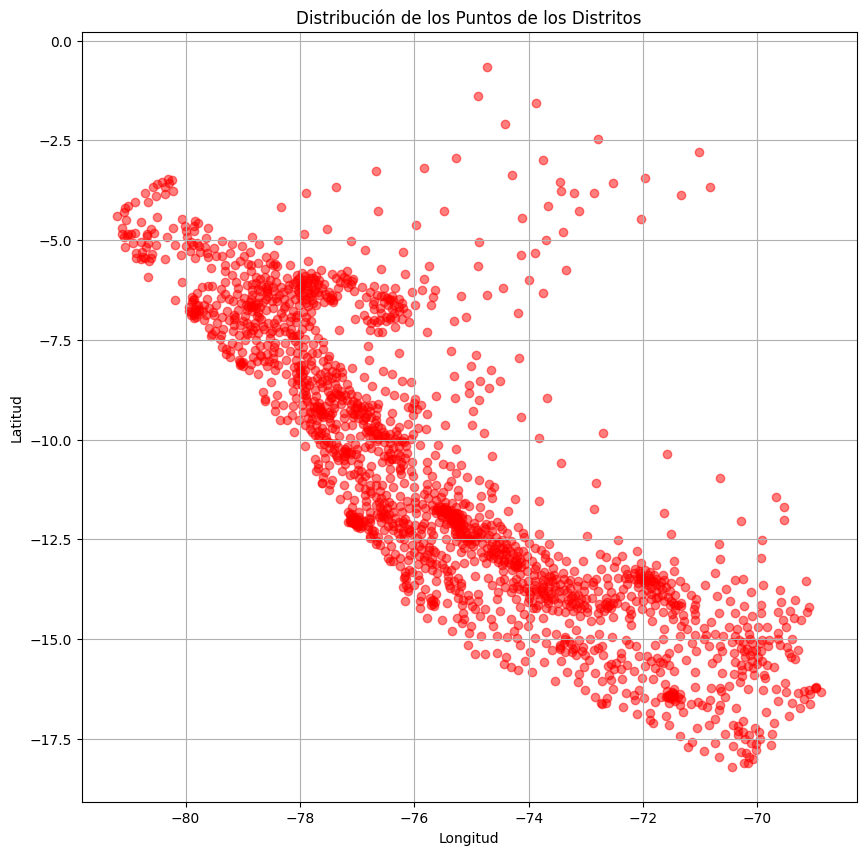

In [33]:
import ast

# Convertir la columna geo_point_2d a diccionario y extraer latitud y longitud
distritos['geo_point_2d'] = distritos['geo_point_2d'].apply(lambda x: ast.literal_eval(x))
distritos['latitude'] = distritos['geo_point_2d'].apply(lambda x: x['lat'])
distritos['longitude'] = distritos['geo_point_2d'].apply(lambda x: x['lon'])

# Mostrar las nuevas columnas con latitud y longitud
print("\nEjemplo de latitudes y longitudes extraídas:")
print(distritos[['nombdist', 'latitude', 'longitude']].head())

# Plotear los puntos en un mapa
plt.figure(figsize=(10, 10))
plt.scatter(distritos['longitude'], distritos['latitude'], color='red', alpha=0.5)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución de los Puntos de los Distritos')
plt.grid()
plt.show()


#### Exploración de la Columna geometry
La columna geometry almacena la geometría de cada distrito en formato de polígonos. Vamos a explorar la información espacial contenida y visualizarla en un mapa:


Ejemplo de geometrías en la columna 'geometry':
0    POLYGON ((-78.91578 -7.32085, -78.9137 -7.3223...
1    POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...
2    POLYGON ((-79.66093 -6.90007, -79.65973 -6.900...
3    POLYGON ((-79.78014 -6.82123, -79.77781 -6.821...
4    POLYGON ((-79.44482 -6.82277, -79.44371 -6.823...
Name: geometry, dtype: geometry


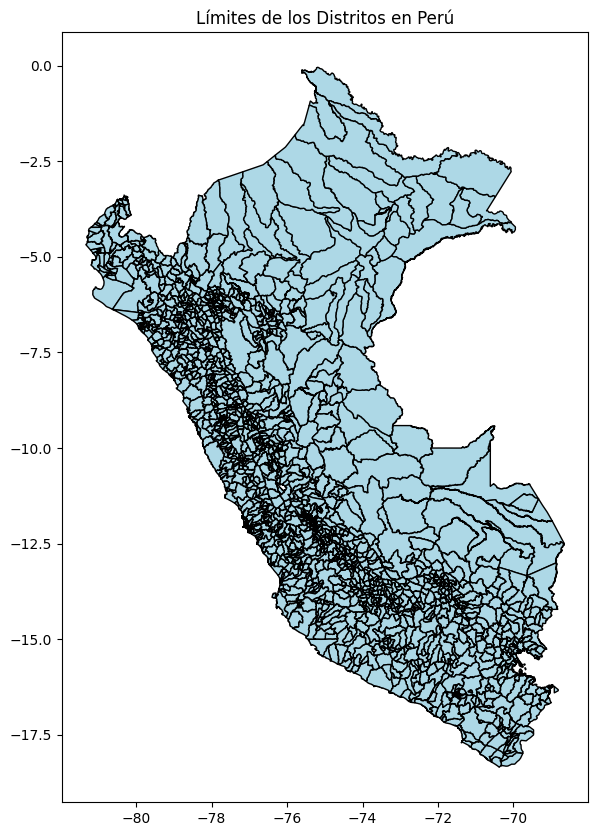


Geometría del distrito MONSEFU:
3    POLYGON ((-79.78014 -6.82123, -79.77781 -6.821...
Name: geometry, dtype: geometry


In [32]:
# Explorar la columna geometry: ver ejemplos de los polígonos
print("Ejemplo de geometrías en la columna 'geometry':")
print(distritos['geometry'].head())

# Plotear los límites de los distritos para visualización
distritos.plot(figsize=(10, 10), color='lightblue', edgecolor='black')
plt.title('Límites de los Distritos en Perú')
plt.show()

# Mostrar información específica de un distrito con su geometría
distrito_especifico = distritos[distritos['nombdist'] == 'MONSEFU']
print("\nGeometría del distrito MONSEFU:")
print(distrito_especifico['geometry'])


# 2. Exploración de los Datos del CSV de Resultados (datasets/temperature-2m.csv)

Primero, asegúrate de que tienes instaladas las librerías necesarias


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Cargar el archivo CSV generado

In [ ]:
ruta_csv = '/content/datasets/temperature-2m.csv'  # Cambia la ruta si el archivo está en otro lugar
datos_climaticos = pd.read_csv(ruta_csv)

Mostrar las primeras filas del archivo CSV

In [ ]:
print("Primeras filas del archivo CSV:")
print(datos_climaticos.head())

Mostrar la estructura de las columnas y sus tipos de datos

In [ ]:
print("\nColumnas presentes en el archivo CSV:")
print(datos_climaticos.columns)

print("\nTipos de datos del archivo CSV:")
print(datos_climaticos.dtypes)

Descripción de las variables numéricas (resumen estadístico)

In [ ]:
print("\nResumen estadístico de las variables numéricas:")
print(datos_climaticos.describe())

Verificar si hay valores faltantes en el dataset

In [ ]:
print("\nCantidad de valores faltantes en cada columna:")
print(datos_climaticos.isna().sum())

Exploración de un distrito específico: Por ejemplo, visualizar la temperatura para un distrito en particular

In [ ]:
distrito = 'Miraflores'
datos_distrito = datos_climaticos[datos_climaticos['Distrito'] == distrito]

Graficar las temperaturas mínimas y máximas para el distrito seleccionado

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(datos_distrito['Fecha'], datos_distrito['Min'], label='Temperatura Mínima')
plt.plot(datos_distrito['Fecha'], datos_distrito['Max'], label='Temperatura Máxima', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.title(f'Temperaturas en {distrito}')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Análisis de la cantidad de datos recolectados por distrito

In [ ]:
print("\nCantidad de observaciones por distrito:")
print(datos_climaticos['Distrito'].value_counts())

# 3. Exploración del Sitio Web (URLs y Manual Testing)


### 1. Preparación del Entorno
Primero, instala los paquetes necesarios y configura el entorno en Google Colab:

In [44]:
# Instalación de Selenium y WebDriver Manager
!pip install selenium
!pip install webdriver-manager

# Instalación de Chromium y ChromeDriver para Google Colab
!apt-get update -y
!apt-get install -y chromium-browser
!apt-get install -y chromium-chromedriver

# Configuración del sistema para encontrar el driver
import sys
sys.path.insert(0, '/usr/lib/chromium-browser/')

# Importar librerías necesarias
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time
from datetime import datetime
import pandas as pd

# Configurar las opciones del navegador Chrome
chrome_options = Options()
chrome_options.add_argument("--headless")  # Modo sin interfaz gráfica
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--window-size=1920,1080")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--remote-debugging-port=9222")
chrome_options.binary_location = "/usr/bin/chromium-browser"


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

### 2. Script de Scraping para un Punto Específico
Ahora que el entorno está preparado, puedes crear un script para extraer datos meteorológicos de una ubicación específica dada una latitud y longitud:

In [46]:
def clima_scraper_lat_lon_fecha(lat: float, lon: float, select: str, fecha: str):
    """
    Esta función obtiene datos meteorológicos de Ventusky para un punto específico de latitud y longitud en una fecha exacta.

    Args:
    - lat (float): Latitud del punto.
    - lon (float): Longitud del punto.
    - select (str): La variable meteorológica a seleccionar (ej., 'temperature-2m').
    - fecha (str): Fecha exacta en el formato 'dd mm yyyy' (ej., '15 marzo 2023').

    Returns:
    - pd.DataFrame: Un DataFrame con los datos meteorológicos recolectados.
    """
    # Inicializar el driver de Chrome usando WebDriver Manager
    try:
        driver = webdriver.Chrome(service=Service("/usr/bin/chromedriver"), options=chrome_options)
    except Exception as e:
        print(f'Error al inicializar el WebDriver: {e}')
        return pd.DataFrame()

    # Definir la URL base
    base = 'https://www.ventusky.com/'
    url = base + f'?p={lat};{lon};12' + f'&l={select}&m=icon'

    # Definir un diccionario para almacenar los datos recolectados
    caso = {'Fecha': [], 'Latitud': [], 'Longitud': [], 'Variable': [], 'Min': [], 'Max': []}

    try:
        # Abrir la URL en el navegador
        driver.get(url)
        time.sleep(10)  # Esperar más tiempo para cargar la página completamente

        # Esperar hasta que el elemento específico esté presente en la página
        driver.implicitly_wait(20)

        # Obtener elementos necesarios del sitio web para interactuar
        try:
            hora_min = driver.find_element(By.XPATH, '//a[text()="01:00"]')
            hora_max = driver.find_element(By.XPATH, '//a[text()="13:00"]')
        except Exception as e:
            print(f'Error al obtener elementos de hora: {e}')
            driver.quit()
            return pd.DataFrame(caso)

        # Clic para desplegar el selector de fechas
        drop_fecha = driver.find_element(By.XPATH, '//a[@class="t f"]')
        drop_fecha.click()
        time.sleep(2)

        # Extraer información de la fecha especificada
        fecha_dt = datetime.strptime(fecha, "%d %B %Y")

        # Seleccionar año y mes
        set_año = driver.find_element(By.XPATH, f'//select[@id="l"]/option[text()="{fecha_dt.year}"]')
        set_año.click()
        time.sleep(1)

        set_mes = driver.find_element(By.XPATH, f'//select[@id="h"]/option[text()="{fecha_dt.strftime("%B").capitalize()}"]')
        set_mes.click()
        time.sleep(1)

        # Seleccionar el día del mes
        set_dia = driver.find_element(By.XPATH, f'//td/a[text()="{fecha_dt.day}"]')
        set_dia.click()
        time.sleep(1)

        # Recolectar datos de la variable meteorológica mínima y máxima
        hora_min.click()
        time.sleep(2)
        mini = driver.find_element(By.XPATH, '//span[@class="aa"]').text

        hora_max.click()
        time.sleep(2)
        maxi = driver.find_element(By.XPATH, '//span[@class="aa"]').text

        # Añadir los datos al diccionario
        caso['Fecha'].append(fecha_dt)
        caso['Latitud'].append(lat)
        caso['Longitud'].append(lon)
        caso['Variable'].append(select)
        caso['Min'].append(mini)
        caso['Max'].append(maxi)

    except Exception as exp:
        print(f'Error durante el scraping: {exp}')
    finally:
        # Cerrar el navegador
        driver.quit()

    # Convertir los datos recolectados en un DataFrame
    return pd.DataFrame(caso)


La generación manual de URLs te permitirá explorar los datos en el sitio web Ventusky para validar la información que deseas extraer.

In [47]:
# Definir los parámetros de latitud, longitud, variable y fecha exacta para scraping
latitud = -12.04  # Latitud de Lima
longitud = -77.03  # Longitud de Lima
variable_seleccionada = 'temperature-2m'  # Por ejemplo, temperatura a 2 metros
fecha_interes = '15 marzo 2023'  # Fecha exacta en el formato 'dd mm yyyy'

# Llamar a la función para scrapear los datos
try:
    datos_punto = clima_scraper_lat_lon_fecha(latitud, longitud, variable_seleccionada, fecha_interes)

    # Mostrar los datos recolectados
    if not datos_punto.empty:
        print("Datos recolectados para el punto seleccionado:")
        print(datos_punto.head())
    else:
        print("No se recolectaron datos. Verifica los errores anteriores.")
except Exception as e:
    print(f'Error al ejecutar la función de scraping: {e}')


Error al inicializar el WebDriver: Message: Service /usr/bin/chromedriver unexpectedly exited. Status code was: 1

No se recolectaron datos. Verifica los errores anteriores.
